# January 28, 2018 Riddler Classic solved using optimization

## The Ostomachion Coloring Problem

[Riddler Classic](https://fivethirtyeight.com/features/how-often-does-the-senate-vote-in-palindromes/)

>From Josh Streeter, graph theory meets ancient Greece in a puzzle that takes two classic mathematical ideas and mashes them together:
>
>The famous four-color theorem states, essentially, that you can color in the regions of any map using at most four colors in such a way that no neighboring regions share a color. A computer-based proof of the theorem was offered in 1976.
>
>Some 2,200 years earlier, the legendary Greek mathematician Archimedes described something called an Ostomachion. It’s a group of pieces, similar to tangrams, that divides a 12-by-12 square into 14 regions. The object is to rearrange the pieces into interesting shapes, such as a Tyrannosaurus rex. It’s often called the oldest known mathematical puzzle.
>
>Your challenge today: Color in the regions of the Ostomachion square with four colors such that each color shades an equal area. (That is, each color needs to shade 36 square units.)
><div>
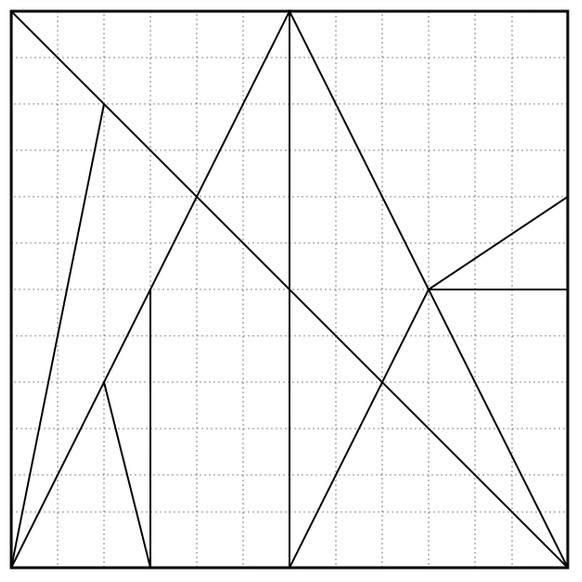
</div>


Below the ostomachion square has been marked up with shape numbers (1 through 14) in black and the area of each shape is written on it. Going forward the shapes will be known as numbered in this diagram.


<div>
<img src="ostomachion.png" width="400"/>
</div>

### Formulating the model

Our model has 54 variables for all 14 shapes and the 4 potential colors (red, yellow, green, and blue). These variables are represented by:

$$
  \begin{equation}
    x_{i j}=
    \begin{cases}
      1, & \text{if shape i is colored using color j}\\
      0, & \text{otherwise}
    \end{cases}
  \end{equation}
$$

Our first constraint is that each shape must be assigned to one color. This is represented as:
\begin{equation*}
\sum_{j=1}^4 x_{i j} = 1 \text {  for shape = i within [1,14]}
\end{equation*}

The second constraint is that each color must have an equal amount of the total area. The total area is 144. This is represented as:

\begin{equation*}
\text {for } a_{i} \text {  equal to area of shape i} \\
\sum_{i=1}^{14} a_{i}x_{i j} = 36 \text {  for color = j within [1,4]} 
\end{equation*}

The last constraint is shapes that share an edge must have different colors. This is represented by:


\begin{equation*}
\ x_{aj} + x_{bj} \leq 1 \text {  for all edges (a,b) and for color = j within [1,4]}
\end{equation*}


Our objective is to minimize:
\begin{equation*}
\sum_{i=1}^{14}\sum_{j=1}^{4} x_{i j}
\end{equation*}


### Solving the model using PuLP
First we create lists for the shape numbers, shape areas, colors and tuples of edges.

In [1]:
shapes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
shapeAreas = [12,12,6,12,24,12,3,6,6,9,3,6,21,12]
edges = ((1,2),(1,6),(2,3),(2,6),(3,4),(3,13),(4,5),(4,8),(4,9),(5,11),(6,7),(6,12),(6,13),(7,12),(7,13),(8,13),(8,14),(9,10),(9,14),(10,11))
colors = ["red", "yellow", "green" ,"blue"]

In [2]:
from pulp import *

In [3]:
#Create the prob variable to contain the problem data
prob = LpProblem("Ostomachion Coloring", LpMinimize)

We create 56 problem variables since we have a variable for each combination of shape (1 - 14) and color (4 choices). An example variable is Shape_1_yellow and a value of 1 indicates that shape number 1 is colored yellow.

In [4]:
#Create the decision variable Xij

choices = LpVariable.dicts("Shape", (shapes, colors),0,1,LpInteger)

In [5]:
#create a list of tuples containing all possible shape and colors
coloredShapes = [(i,j) for i in shapes for j in colors]

We add the objective function to the prob variable:
\begin{equation*}
\sum_{i=1}^{14}\sum_{j=1}^{4} x_{i j}
\end{equation*}


In [6]:
#Try an objective function
prob += lpSum(choices[shape][color] for (shape, color) in coloredShapes), "Objective"

We add the constraint ensuring each shape is assigned only one color:
\begin{equation*}
\sum_{j=1}^4 x_{i j} = 1 \text {  for shape = i within [1,14]}
\end{equation*}

In [7]:
#Create a constraint ensuring that each shape is assigned to only one color
for shape in shapes:
    prob += lpSum(choices[shape][color] for color in colors) == 1, ""

We add the constraint that each color has an equal amount of area:

\begin{equation*}
\text {for } a_{i} \text {  equal to area of shape i} \\
\sum_{i=1}^{14} a_{i}x_{i j} = 36 \text {  for color = j within [1,4]} 
\end{equation*}


In [8]:
#Create a constraint ensuring that each color represents an equal amount of total area
for color in colors:
    prob += lpSum(shapeAreas[(shape-1)]*choices[shape][color] for shape in shapes) == 36, ""

We add the constraint that each pair of shapes that share an edge must have two different colors. If shapes a and b are neighbors they share an edge (a,b).

\begin{equation*}
\ x_{aj} + x_{bj} \leq 1 \text {  for all edges (a,b)and for color = j within [1,4]}
\end{equation*}

In [9]:
#Create a constraint so that two neighboring (shapes that share an edge) do not have the same
for edge in edges:
    prob += lpSum(choices[edge[0]][color] + choices[edge[1]][color] for color in colors) <= 1, ""

Start the problem with an intial color. Here we set set shape 1 to have color red.

In [10]:
#Create a constraint that shape 1 is red
prob += choices[shapes[0]][colors[0]] == 1, ""

Write the problem out

In [11]:
prob.writeLP("Ostomachion.lp")

This is where we notice the solver is not working, and the problem has been deemed infeasible.

In [12]:
#The problem is solved using PuLP's choice of solver
prob.solve()

-1

In [13]:
#The status is printed
print("Status:", LpStatus[prob.status])

Status: Infeasible
